# Demographic Analysis of UK Population Using 2021 Census Data

**Author:** Rashad Malik

## Project aim and outline

The aim of this project is to analyse national demographic data from the 2021 UK Census, focusing on the population distribution across different age groups in England.

The dataset includes demographic details from "Lower-layer Super Output Areas" (LSOAs) in England. As defined by the [Office for National Statistics](https://www.ons.gov.uk/methodology/geography/ukgeographies/statisticalgeographies):
> **Lower layer Super Output Areas (LSOAs)** are made up of groups of Output Areas (OAs), usually four or five. They comprise between 400 and 1,200 households and have a usually resident population between 1,000 and 3,000 persons.

This project's primary objectives are as follows:
- Manipulate the data using Pandas in order to visualise the age distributions, and present insights into population patterns.
- Compare differences between specific LSOAs and national averages to explore regional differences.
- Additional exploratory work utilising the GeoPandas library to draw maps.

The notebook contains the following sections:
- **Introduction**
  - Importing required libraries, describing the dataset and loading the data
- **Analysis**
  - Part 1: Bar chart of the age profile
  - Part 2: Distribution of the younger, older and median ages in each LSOA
  - Part 3: Comparing the median age distributions by area type
  - Part 4: Classification of Unusual Areas by Proportions
  - Part 5: Mapping
- **Summary and conclusion**
- **References**

## Introduction

### Importing libraries

The following libraries are required for our analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

Additionally, we are setting a *"3 significant figures"* flag for Pandas, to improve readability within this project by avoiding long decimal numbers.

In [2]:
pd.set_option("display.float_format", lambda x: f"{x:.3g}")

### The dataset

#### Dataset description and variables

The data was obtained from [Nomis](https://www.nomisweb.co.uk/sources/census_2021_bulk), an online platform hosted by the Office for National Statistics (ONS), where they publish statistics related to population, society and the labour market at national, regional and local levels.

For this project, we are using the **"TS007A - Age by five-year age bands"** CSV file, with some modifications:
- Data for Wales has been deleted.
- Columns have been renamed to ensure there are no spaces.
- The ```PartOfCode``` and ```PartOfName``` columns have been added.

> **Note:** The ```PartOfCode``` variable is a nine-character geocode (known as a [GSS code](https://en.wikipedia.org/wiki/GSS_coding_system)), maintained by the UK's Office for National Statistics (ONS) to represent a wide range of geographical areas of the UK, for use in tabulating census and other statistical data. 

The dataset variables are as follows:

| **Variable**               | **Type**  | **Description**                                                                                                                                 |
|----------------------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| LSOAName                   | String    | Name of the LSOA                                                                                                                                |
| LSOACode                   | String    | Code of the LSOA                                                                                                                                |
| PartOfCode                 | String    | Code of a larger area containing this LSOA                                                                                                       |
| PartOfName                 | String    | Name of the larger area containing this LSOA                                                                                                     |
| Total                      | Integer   | Total number of usual residents in this LSOA at the time of the 2021 census                                                                       |
| Age4Under, Age5to9, Age10to14, Age15to19, Age20to24, Age25to29, Age30to34, Age35to39, Age40to44, Age45to49, Age50to54, Age55to59, Age60to64, Age65to69, Age70to74, Age75to79, Age80to84, Age85Over | Integer | Breakdown of the number of usual residents in this LSOA at the time of the 2021 census in 5 year age ranges (plus an open-ended range for ages 85 and over)|

#### Data loading and preliminary exploration

Below, we load the data as a Pandas dataframe, and do some preliminary data exploration. 

In [3]:
lsoa = pd.read_csv("data/LSOA_data.csv")

In [4]:
# Displaying dataset information
print("A basic summary of the dataframe:\n")
print(lsoa.info())

A basic summary of the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33755 entries, 0 to 33754
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LSOAName    33755 non-null  object
 1   LSOACode    33755 non-null  object
 2   PartOfCode  33755 non-null  object
 3   PartOfName  33755 non-null  object
 4   Total       33755 non-null  int64 
 5   Age4Under   33755 non-null  int64 
 6   Age5to9     33755 non-null  int64 
 7   Age10to14   33755 non-null  int64 
 8   Age15to19   33755 non-null  int64 
 9   Age20to24   33755 non-null  int64 
 10  Age25to29   33755 non-null  int64 
 11  Age30to34   33755 non-null  int64 
 12  Age35to39   33755 non-null  int64 
 13  Age40to44   33755 non-null  int64 
 14  Age45to49   33755 non-null  int64 
 15  Age50to54   33755 non-null  int64 
 16  Age55to59   33755 non-null  int64 
 17  Age60to64   33755 non-null  int64 
 18  Age65to69   33755 non-null  int64 
 19  Age70to74  

In [5]:
"E06000001" in lsoa["PartOfCode"]

False

In [6]:
# Printing the first and last 5 rows
print("First 5 rows:\n", lsoa.head(),"\n", "\nLast 5 rows:\n", lsoa.tail())

First 5 rows:
                     LSOAName   LSOACode PartOfCode            PartOfName  \
0        City of London 001A  E01000001  E09000001        City of London   
1        City of London 001B  E01000002  E09000001        City of London   
2        City of London 001C  E01000003  E09000001        City of London   
3        City of London 001E  E01000005  E09000001        City of London   
4  Barking and Dagenham 016A  E01000006  E09000002  Barking and Dagenham   

   Total  Age4Under  Age5to9  Age10to14  Age15to19  Age20to24  ...  Age40to44  \
0   1473         52       34         32         23         90  ...        114   
1   1384         33       24         22         31        100  ...         92   
2   1613         39       32         33         23         96  ...        111   
3   1101         52       45         35         89        118  ...         61   
4   1842        153      127        110        122        124  ...        164   

   Age45to49  Age50to54  Age55to59  Age60

We can see from the above exploratory analysis that the data was loaded successfully, and that the dataframe contains **23 variables (columns), and 33,755 items (rows)**.

## Analysis

### Part 1: Bar chart of the age profile

#### 1.1 Total population of England

Firstly, we will calculate the total population of England based on the census data.

In [7]:
# Summing the Total column
eng_pop = lsoa["Total"].sum()
print("Total population of England:\n" + str(eng_pop))

Total population of England:
56490091


Next, we will calculate the population proportion for each age range.

In [8]:
# Automatically selecting all columns that start with "Age"
age_columns = lsoa.filter(like="Age").columns

# Calculating proportions
age_sums = lsoa[age_columns].sum()
age_proportions = age_sums / eng_pop

print("Age groups and their overall population proportions for England (to 3 s.f.):\n")
print(age_proportions)

Age groups and their overall population proportions for England (to 3 s.f.):

Age4Under   0.0545
Age5to9     0.0593
Age10to14   0.0604
Age15to19    0.057
Age20to24   0.0604
Age25to29   0.0658
Age30to34     0.07
Age35to39   0.0672
Age40to44   0.0634
Age45to49   0.0638
Age50to54   0.0692
Age55to59   0.0674
Age60to64   0.0576
Age65to69    0.049
Age70to74   0.0495
Age75to79   0.0361
Age80to84   0.0252
Age85Over   0.0243
dtype: float64


Now we are able to plot the proportions on a bar graph.

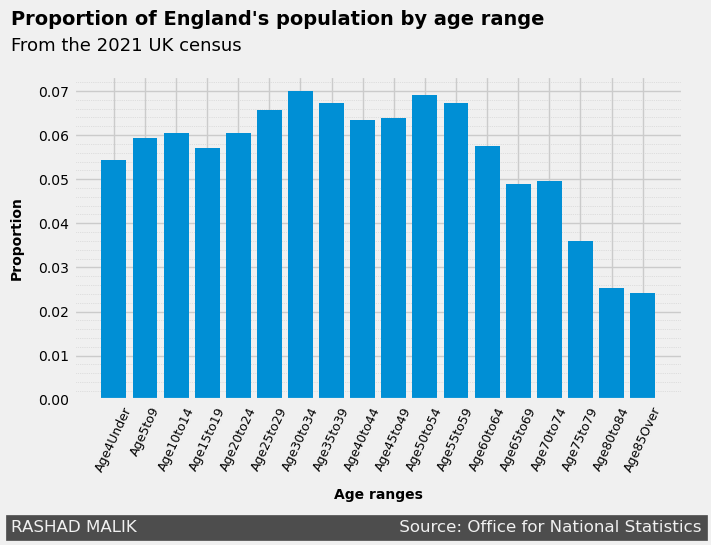

In [9]:
# Plotting and formatting the bar graph
style.use("fivethirtyeight")
plt.figure(figsize = (7, 4))
plt.bar(age_columns, age_proportions)

plt.text(-3.3, 0.085, 
         "Proportion of England's population by age range", 
         size = 14, weight = "bold", color = "black")
plt.text(-3.3, 0.079, 
         "From the 2021 UK census", 
         size = 13, color = "black")
plt.text(-3.3, -0.03, 
         "RASHAD MALIK" + " " * 50 + "Source: Office for National Statistics", 
         color = "#f0f0f0", 
         backgroundcolor = "#4d4d4d", 
         fontsize=12)

plt.ylabel("Proportion", fontsize = 10, fontweight = "bold", labelpad = 10)
plt.xlabel("Age ranges", fontsize = 10, fontweight = "bold", labelpad = 10)

plt.xticks(rotation = 65, fontsize = 9)
plt.yticks(fontsize = 10)
plt.minorticks_on()

plt.grid(True, which="both", axis="y")
plt.grid(True, which="minor", axis="y", linestyle=":", linewidth=0.5)

plt.show()

From the bar graph we can see that the highest population proportions are in the age group **35-39**, making up around 7% of the total population. As the age increases beyond this group, the population proportion steadily falls, with the lowest proportions observed in the age ranges **80 to 84** and **85 and over**, each representing less than 3% of the population.

The graph highlights the concentration of the population in younger to middle-aged groups and a large drop in the elderly age ranges.

#### 1.2 Comparing the population of each age range across different areas

Next, we want to compare the total population of England in each age range to the following LSOAs:
- E01005044 (Bury 026E)
- E01020395 (Dorset 024A)
- E01009136 (Birmingham 014E)

We will use proportions so that the differences in total populations in the three LSOAs and England do not matter. Firstly, we will create a dataframe with rows for the age proportions of the three zones, and the age proportions of England overall.

In [10]:
# Defining the LSOA areas that we will observe
lsoa_codes = ["E01005044", "E01020395", "E01009136"]
lsoa_names = ["Bury 026E", "Dorset 024A", "Birmingham 014E"]

# Filtering for the required areas, and setting the index to the name of the area
filtered_lsoa = lsoa[lsoa["LSOACode"].isin(lsoa_codes)]
filtered_lsoa = filtered_lsoa.set_index('LSOAName')

# Calculate proportions for each LSOA
lsoa_proportions = filtered_lsoa[age_columns].div(filtered_lsoa["Total"], axis=0)
lsoa_proportions.loc["England Overall"] = age_proportions

print("The new dataframe with the required proportions (to 3 s.f.):\n")
print(lsoa_proportions)

The new dataframe with the required proportions (to 3 s.f.):

                 Age4Under  Age5to9  Age10to14  Age15to19  Age20to24  \
LSOAName                                                               
Bury 026E             0.11    0.139      0.149     0.0984     0.0423   
Birmingham 014E     0.0603    0.058     0.0517     0.0631     0.0506   
Dorset 024A         0.0115    0.022     0.0257     0.0315     0.0388   
England Overall     0.0545   0.0593     0.0604      0.057     0.0604   

                 Age25to29  Age30to34  Age35to39  Age40to44  Age45to49  \
LSOAName                                                                 
Bury 026E            0.049     0.0622     0.0673     0.0597      0.052   
Birmingham 014E      0.058     0.0722     0.0847     0.0466     0.0506   
Dorset 024A         0.0289     0.0194     0.0194      0.032     0.0393   
England Overall     0.0658       0.07     0.0672     0.0634     0.0638   

                 Age50to54  Age55to59  Age60to64  Age65to69 

We can now plot these proportions. We will use a graph with 4 subplots, so that we can easily view differences across the different areas:

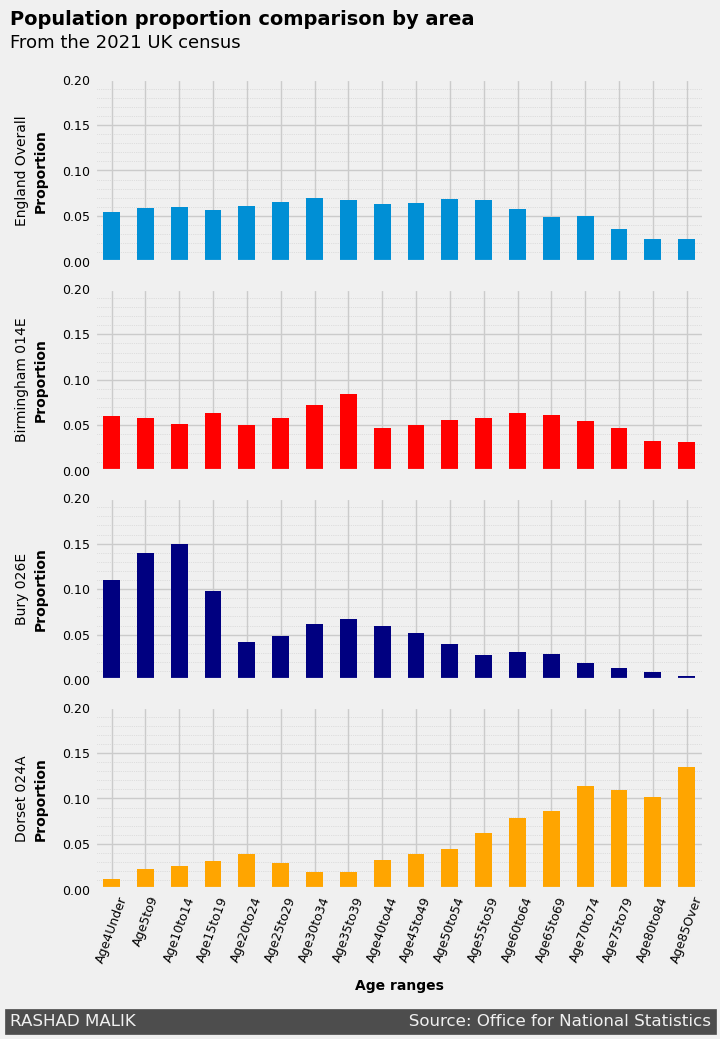

In [11]:
# Creating 4 subplots
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (7, 10), sharex = True)

# List of LSOAs, and custom colours for the subplots
lsoa_columns = ["England Overall", "Birmingham 014E", "Bury 026E", "Dorset 024A"]
colour_palette = ["Red", "Navy", "Orange"]

# Text and labels for the plot
plt.text(-3, 0.95, 
         "Population proportion comparison by area", 
         size=14, weight="bold", color="black")
plt.text(-3, 0.925, 
         "From the 2021 UK census", 
         size=13, color="black")
plt.text(-3, -0.15, 
         "RASHAD MALIK" + " " * 52 + "Source: Office for National Statistics", 
         color="#f0f0f0", 
         backgroundcolor="#4d4d4d", 
         fontsize=12)

# Iterating over each area to create each subplot
for i, ax in enumerate(axes):
    lsoa_name = lsoa_columns[i]
    if i == 0:
        lsoa_proportions.loc[lsoa_name].plot(kind="bar", ax=ax, stacked=True)
    else:
        lsoa_proportions.loc[lsoa_name].plot(kind="bar", ax=ax, stacked=True, color=colour_palette[i-1])
    
    ax.set_ylabel("Proportion", fontsize=10, fontweight="bold", labelpad=10)
    ax.grid(True, which="both", axis="y", linestyle=":", linewidth=0.5)

    ax.grid(True, which="major", axis="y", linestyle="-", linewidth=1)
    ax.set_ylim([0, 0.2])
    ax.tick_params(axis="y", labelsize=9)
    y_ticks = np.linspace(0, 0.2, 5)
    ax.set_yticks(y_ticks)
    ax.minorticks_on()

    ax.text(-0.13, 0.5, lsoa_name, transform=ax.transAxes, fontsize=10,
            verticalalignment="center", horizontalalignment="left", rotation=90)

# Additional label adjustments
axes[-1].set_xlabel("Age ranges", fontsize=10, fontweight="bold", labelpad=10)
plt.xticks(rotation=70, fontsize=9)
plt.subplots_adjust(hspace=0.15)

plt.show()

#### 1.3 Age distribution discussion

By looking at the above graph, we can see that age distribution in areas can differ (sometimes greatly) from the national average.

- For **Birmingham 014E**, the age distribution shows a spike around the younger working-age groups, particularly those aged 35-39 which exceeds 8% compared to the national average of just under 7%. Proportions for older age groups (65 and above) are relatively lower compared to the national average.
- **Bury 026E** has a more pronounced peak in the children and school-age group (ages 0-19), with values as high as 15% for certain age ranges. The distribution then tapers off more quickly in the older age ranges, with a noticeable drop-off for those aged 54 and above.
- **Dorset 024A** shows a skewed distribution toward older age groups, especially ages 55 and above, with proportions reaching over 10% for some groups and exceeding 13% for the oldest age group (85+). Younger age groups (under 30) are significantly lower than the national average, with most values well under 5%.

These distribution difference can be due to several factors:
- Large cities, like **Birmingham**, attract a diverse range of age groups due to their comprehensive facilities for families, abundant job opportunities, and universities that appeal to young adults. These cities also provide healthcare and services for the elderly, making them attractive to all demographics.
- In contrast, places like **Bury** may be more family-oriented, with ample schools, nurseries, and a reputation for being safer and more peaceful than larger urban centres.
- Meanwhile, areas such as **Dorset** are often popular among retirees, offering a tranquil environment with coastal views, fresh air, and a slower pace of life. Additionally, the affordability of housing and access to healthcare in these areas can further influence the influx of older populations, making such regions ideal for those seeking a more relaxed lifestyle in their later years.

### Part 2: Distribution of the younger, older and median ages in each LSOA
In this section, we will analyse the distribution of median ages for younger and older age groups in each LSOA.

#### 2.1 Adding new variables to the dataframe

Firstly, we will calculate the proportion of younger residents in each LSOA. The age groups we will use for "younger" ages are the following:
- ```Age4Under``` (ages 0 to 4)
- ```Age5to9``` (ages 5 to 9)
- ```Age10to14``` (ages 10 to 14)
- ```Age15to19``` (ages 15 to 19)

In [12]:
# Defining the younger ages
younger_age_columns = ["Age4Under", "Age5to9", "Age10to14", "Age15to19"]

# Initialising the new columns with NaN values
lsoa["YoungerResidents"] = np.NaN
lsoa["YoungerResidents"] = lsoa["YoungerResidents"].astype(object)
lsoa["ProportionYounger"] = np.NaN
lsoa["ProportionYounger"] = lsoa["ProportionYounger"].astype(object)

# Calculating the proportion of younger residents, and creating a new column
lsoa["YoungerResidents"] = lsoa[younger_age_columns].sum(axis=1)
lsoa["ProportionYounger"] = lsoa["YoungerResidents"] / lsoa["Total"]

# Printing the first and last 5 rows to verify
print("First 5 rows:\n", lsoa[["LSOAName", "Total", "YoungerResidents", "ProportionYounger"]].head(),
      "\n", "\nLast 5 rows:\n", lsoa[["LSOAName", "Total", "YoungerResidents", "ProportionYounger"]].tail())

First 5 rows:
                     LSOAName  Total  YoungerResidents  ProportionYounger
0        City of London 001A   1473               141             0.0957
1        City of London 001B   1384               110             0.0795
2        City of London 001C   1613               127             0.0787
3        City of London 001E   1101               221              0.201
4  Barking and Dagenham 016A   1842               512              0.278 
 
Last 5 rows:
                        LSOAName  Total  YoungerResidents  ProportionYounger
33750  Vale of White Horse 014H   1169               180              0.154
33751  Vale of White Horse 015G   1519               371              0.244
33752  Vale of White Horse 015H   1610               504              0.313
33753  Vale of White Horse 015I   1609               461              0.287
33754     West Oxfordshire 004H   1465               325              0.222


Now, we will calculate the proportion of older residents in each LSOA. The age groups we will use for "older" ages are the following:
- ```Age65to69``` (ages 65 to 69)
- ```Age70to74``` (ages 70 to 74)
- ```Age75to79``` (ages 75 to 79)
- ```Age80to84``` (ages 80 to 84)
- ```Age85Over``` (ages 85 and over)

In [13]:
# Defining the older ages
older_age_columns = ["Age65to69", "Age70to74", "Age75to79", "Age80to84", "Age85Over"]

# Initialising the new columns with NaN values
lsoa["OlderResidents"] = np.NaN
lsoa["OlderResidents"] = lsoa["OlderResidents"].astype(object)
lsoa["ProportionOlder"] = np.NaN
lsoa["ProportionOlder"] = lsoa["ProportionOlder"].astype(object)

# Calculating the proportion of older residents, and creating a new column
lsoa["OlderResidents"] = lsoa[older_age_columns].sum(axis=1)
lsoa["ProportionOlder"] = lsoa["OlderResidents"] / lsoa["Total"]

# Printing the first and last 5 rows to verify
print("First 5 rows:\n", lsoa[["LSOAName", "Total", "OlderResidents", "ProportionOlder"]].head(),
      "\n", "\nLast 5 rows:\n", lsoa[["LSOAName", "Total", "OlderResidents", "ProportionOlder"]].tail())

First 5 rows:
                     LSOAName  Total  OlderResidents  ProportionOlder
0        City of London 001A   1473             370            0.251
1        City of London 001B   1384             277              0.2
2        City of London 001C   1613             285            0.177
3        City of London 001E   1101             104           0.0945
4  Barking and Dagenham 016A   1842             158           0.0858 
 
Last 5 rows:
                        LSOAName  Total  OlderResidents  ProportionOlder
33750  Vale of White Horse 014H   1169             320            0.274
33751  Vale of White Horse 015G   1519             250            0.165
33752  Vale of White Horse 015H   1610              95            0.059
33753  Vale of White Horse 015I   1609             174            0.108
33754     West Oxfordshire 004H   1465             354            0.242


We will now calculate the median age of each LSOA. This can be done in three parts.

For the first step, we define the lower-age boundaries for our age ranges.

In [14]:
# Defining lower age boundaries
ages = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]

Next, we define a function for computing the median age across a row in our dataframe.

In [15]:
def compute_median_age(row):
    totals = row.loc[age_columns].values
    cumul_fract = (np.cumsum(totals)) / (totals.sum())

    index_label = (cumul_fract >= 0.5).argmax()
    index = index_label

    if index > 0:
        prev_fract = cumul_fract[index - 1]
    else:
        prev_fract = 0

    remaining_fract = 0.5 - prev_fract
    fract_increase = cumul_fract[index] - prev_fract
    years_to_add = 5 * (remaining_fract / fract_increase)

    median_age = ages[index] + years_to_add
    return median_age

Finally, we can apply the median function to our dataframe, adding a new column with the calculated medians.

In [16]:
# Initialising the new column with NaN values
lsoa["MedianAge"] = np.NaN
lsoa["MedianAge"] = lsoa["MedianAge"].astype(object)

# Applying the median age function to the dataframe
lsoa["MedianAge"] = lsoa.apply(compute_median_age, axis=1)

In [17]:
# Printing the first and last 5 rows to verify
print("First 5 rows (median age to 3 s.f.):\n", lsoa[["LSOACode", "LSOAName", "MedianAge"]].head(),
      "\n", "\nLast 5 rows (median age to 3 s.f.):\n", lsoa[["LSOACode", "LSOAName", "MedianAge"]].tail())

First 5 rows (median age to 3 s.f.):
     LSOACode                   LSOAName  MedianAge
0  E01000001        City of London 001A       44.3
1  E01000002        City of London 001B       43.9
2  E01000003        City of London 001C       43.9
3  E01000005        City of London 001E       34.9
4  E01000006  Barking and Dagenham 016A       34.5 
 
Last 5 rows (median age to 3 s.f.):
         LSOACode                  LSOAName  MedianAge
33750  E01035758  Vale of White Horse 014H       44.9
33751  E01035759  Vale of White Horse 015G         40
33752  E01035760  Vale of White Horse 015H       31.7
33753  E01035761  Vale of White Horse 015I         33
33754  E01035762     West Oxfordshire 004H       46.9


#### 2.2 Summary statistics and distributions

We can now explore the median ages using a few different tools.

Firstly we can view the summary statistics:

In [18]:
print("Summary statistics (to 3 s.f.) for the distributions of the total population,\nthe younger and older proportions, and the median age for all LSOAs:\n")
print(lsoa[["Total", "ProportionYounger", "ProportionOlder", "MedianAge"]].describe())

Summary statistics (to 3 s.f.) for the distributions of the total population,
the younger and older proportions, and the median age for all LSOAs:

         Total  ProportionYounger  ProportionOlder  MedianAge
count 3.38e+04           3.38e+04         3.38e+04   3.38e+04
mean  1.67e+03              0.228            0.189         42
std        353             0.0553           0.0855       7.78
min        999             0.0181         0.000736       14.5
25%   1.44e+03              0.192            0.124       36.1
50%   1.61e+03              0.223            0.183       41.5
75%   1.84e+03              0.259            0.247       47.8
max    9.9e+03              0.629            0.655       71.9


Next, we will create a histogram of the total population across all LSOAs.

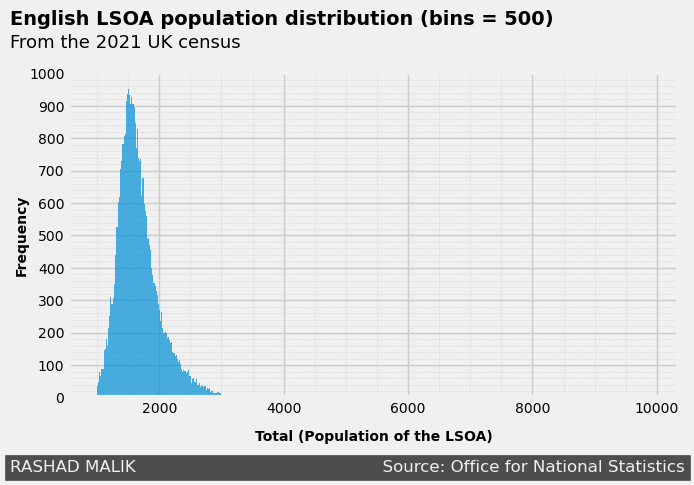

In [19]:
# Plotting the histogram
plt.figure(figsize=(7 ,4))
plt.hist(lsoa["Total"], bins=500, alpha=0.7)

plt.text(-400, 1150, 
         "English LSOA population distribution (bins = 500)", 
         size = 14, weight = "bold", color = "black")
plt.text(-400, 1080, 
         "From the 2021 UK census", 
         size = 13, color = "black")
plt.text(-400, -230, 
         "RASHAD MALIK" + " " * 47 + "Source: Office for National Statistics", 
         color = "#f0f0f0", 
         backgroundcolor = "#4d4d4d", 
         fontsize=12)

plt.ylabel("Frequency", fontsize = 10, fontweight = "bold", labelpad = 0)
plt.xlabel("Total (Population of the LSOA)", fontsize = 10, fontweight = "bold", labelpad = 10)

plt.xticks(fontsize = 10)
y_ticks = np.arange(0, 1100, 100)
plt.yticks(y_ticks, fontsize = 10)

plt.minorticks_on()

plt.grid(True, which="both", axis="both")
plt.grid(True, which="minor", axis="both", linestyle=":", linewidth=0.5)

plt.show()

We can see a significant right-skew (the data is mainly concentrated on the left side of the graph). That means there are a few areas that have much higher populations than most LSOAs. Lets print a small table that returns the top 10 LSOAs by population:

In [20]:
print(lsoa[["LSOACode", "LSOAName", "Total"]].nlargest(10, "Total"))

        LSOACode            LSOAName  Total
27075  E01028521         Oxford 008A   9900
33508  E01035514      Cambridge 005H   8226
32531  E01034493  County Durham 030H   6466
12706  E01013378           York 023B   6219
23829  E01025105      Lancaster 019A   5746
33510  E01035516      Cambridge 007I   5737
31697  E01033617     Birmingham 050F   5671
33303  E01035309     Canterbury 012H   5447
33502  E01035508     Nottingham 041F   4950
16174  E01017032     Portsmouth 027C   4913


These LSOAs have significantly higher populations than the rest of our dataset, and could be considered as **outliers**.

Now, we will check the distribution of median ages, comparing the median age across all of England, to the younger and older groups we defined earlier.

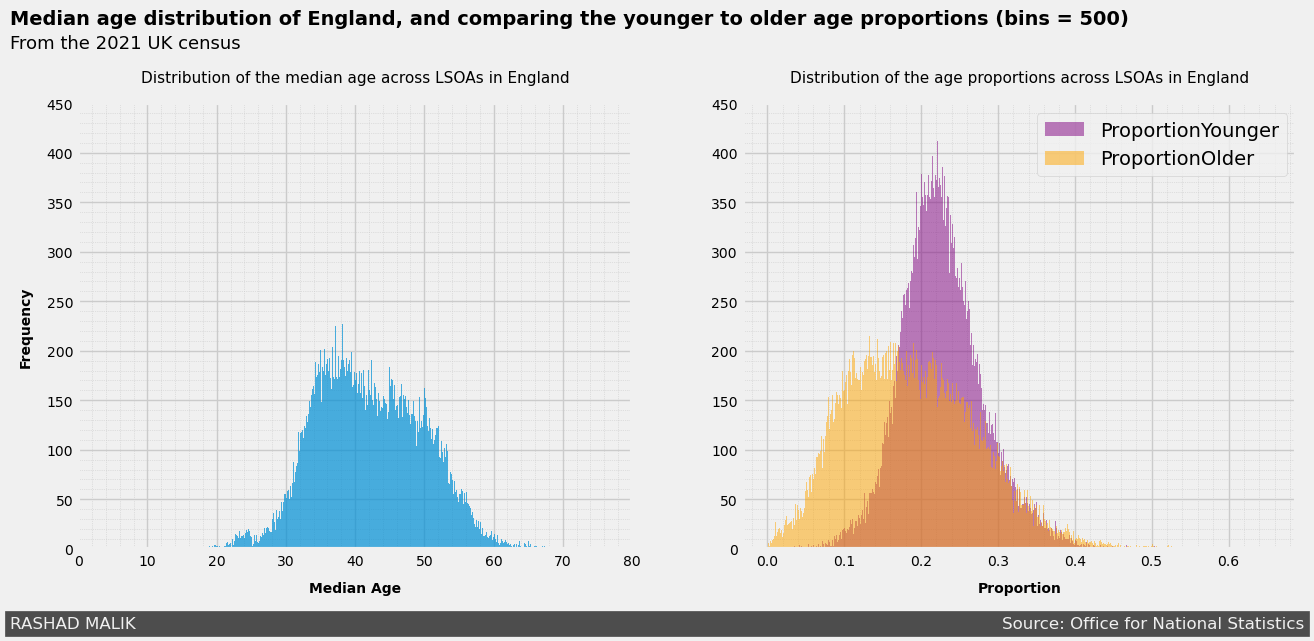

In [21]:
# Plotting the two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))

plt.text(-0.985, 530, 
         "Median age distribution of England, and comparing the younger to older age proportions (bins = 500)", 
         size = 14, weight = "bold", color = "black")
plt.text(-0.985, 506, 
         "From the 2021 UK census", 
         size = 13, color = "black")
plt.text(-0.985, -80, 
         "RASHAD MALIK" + " " * 165 + "Source: Office for National Statistics", 
         color = "#f0f0f0", 
         backgroundcolor = "#4d4d4d", 
         fontsize=12)

# Formatting first subplot
p1 = lsoa["MedianAge"]
axes[0].hist(p1, bins=500, alpha=0.7)
axes[0].set_title("Distribution of the median age across LSOAs in England", fontsize=11, pad=15)
axes[0].set_ylabel("Frequency", fontsize = 10, fontweight = "bold", labelpad = 10)
axes[0].set_xlabel("Median Age", fontsize = 10, fontweight = "bold", labelpad = 10)
axes[0].set_ylim(0, 450)
axes[0].set_xlim(0, 80)
axes[0].tick_params(axis="both", labelsize=10)
axes[0].minorticks_on()
axes[0].grid(True, which="both", axis="both")
axes[0].grid(True, which="minor", axis="both", linestyle=":", linewidth=0.5)

# Formatting second subplot
numeric_columns = ["ProportionYounger", "ProportionOlder"]
p2 = lsoa[numeric_columns]
p2.plot(kind="hist", bins=500, alpha=0.5, ax=axes[1], color = ["purple", "orange"])
axes[1].set_title("Distribution of the age proportions across LSOAs in England", fontsize=11, pad=15)
axes[1].set_xlabel("Proportion", fontsize = 10, fontweight = "bold", labelpad = 10)
axes[1].set_ylabel("")
axes[1].set_ylim(0, 450)
axes[1].tick_params(axis="both", labelsize=10)
axes[1].minorticks_on()
axes[1].grid(True, which="both", axis="both")
axes[1].grid(True, which="minor", axis="both", linestyle=":", linewidth=0.5)

plt.show()

From looking at the above graph, we can note the following:
- The median age distribution shows a peak around 38-40 years, indicating that most areas have a median age within this range.
- There are fewer areas with very young or very old median ages, with a slight skew (trend) towards older ages as more areas have a median age above 40.
- In the age proportion distribution, the proportion of younger populations peaks around 20%, while the proportion of older populations peaks slightly lower at around 15%.
- There are a few areas where there are high older and younger proportions (above 30%), which could potentially be areas of concern, as it means those LSOAs have a high dependent population. 
- Both distributions taper off for higher proportions, suggesting that few areas have very high percentages of either younger or older populations.

Overall, most areas have a balanced population, though there tend to be more younger than older people across the LSOAs in England.

#### 2.3 Median age comparison and discussion

We will use the same function we defined in section 2.2.1 to calculate the **median age for the whole of England**, and we will compare that value to the **50th percentile value of the distribution of median ages by LSOA**.

In [22]:
calculated_england_median_age = compute_median_age(lsoa.loc[:, age_columns].sum())
fiftieth_percentile = lsoa.loc[:, "MedianAge"].median()

print("Median age for the whole of England (to 3.s.f.):\n", f"{calculated_england_median_age:.3g}",
      "\n50th percentile value of the distribution of median ages by LSOA (to 3 s.f.):\n", f"{fiftieth_percentile:.3g}")

Median age for the whole of England (to 3.s.f.):
 40.4 
50th percentile value of the distribution of median ages by LSOA (to 3 s.f.):
 41.5


We can see a small difference of 1.1 years between the median age for the whole of England versus the 50th percentile value of median ages by LSOA. The reason behind this is to do with the non-uniform size of LSOAs. An LSOA with a large population might have a very different median age than an LSOA with a small population. When you calculate the median for all of England, the larger LSOAs impact the overall median more than the smaller LSOAs. 

The fact that the median age for the whole of England is slightly less than the 50th percentile of the distribution of median ages by LSOA tells us that larger LSOAs tend to have younger populations.

Now, lets take a look at the LSOAs with the smallest medians, and the largest medians.

In [23]:
print("The 10 LSOAs with the lowest median ages:")
print(lsoa.loc[:, ["LSOAName", "LSOACode", "MedianAge"]].sort_values("MedianAge").head(10),"\n\n")
print("The 10 LSOAs with the highest median ages:")
print(lsoa.loc[:, ["LSOAName", "LSOACode", "MedianAge"]].sort_values("MedianAge").tail(10))

The 10 LSOAs with the lowest median ages:
                                LSOAName   LSOACode  MedianAge
5308                        Salford 031C  E01005614       14.5
32930                    Birmingham 079G  E01034936       18.9
13655  Bath and North East Somerset 012A  E01014380       18.9
12706                          York 023B  E01013378         19
32958                     Harrogate 008F  E01034964         19
7478                      Sheffield 038C  E01007862         19
9167                       Coventry 042C  E01009671       19.1
13971                       Bristol 015F  E01014714       19.3
32666                        Exeter 001G  E01034628       19.3
32442                     Liverpool 042H  E01034404       19.4 


The 10 LSOAs with the highest median ages:
                                       LSOAName   LSOACode  MedianAge
20038                               Rother 010B  E01021106       68.2
18876                           East Devon 017A  E01019894         69
20074    

Looking at these tables, we can further investigate the extreme median ages.
- We can see that the LSOA with the **lowest median age** is [Salford 031C](https://statistics.data.gov.uk/atlas/resource?uri=http%3A%2F%2Fstatistics.data.gov.uk%2Fid%2Fstatistical-geography%2FE01005614). Investigating this area using Google Maps, I was able to notice a few primary schools, nurseries, and residential neighbourhoods, which may imply the presence of younger families, thus explaining the low median age.
- The LSOA with the **highest median age** is [East Devon 012B](https://statistics.data.gov.uk/atlas/resource?uri=http%3A%2F%2Fstatistics.data.gov.uk%2Fid%2Fstatistical-geography%2FE01019957). Investigating this area via Google Maps showed me multiple retirement homes. Additionally, this area is by the coast, and as we already discussed in section 2.1.3, coastal areas can be popular with older age demographics. This may help explain the high median age in this region.

### Part 3: Comparing the median age distributions by area type

The aim of this section is to compare distributions, grouping the LSOAs by type. The area types are given by the PartOfCode variable, as follows:

| First 3 Characters of `PartOfCode` | Type of Area                                                                                       |
|------------------------------------|----------------------------------------------------------------------------------------------------|
| E06                                | **Unitary Authorities**: typically more urban areas. One example is code E06000004 which is Stockton-on-Tees.   |
| E07                                | **Non-metropolitan Districts**: more rural. One example is E07000085 which is East Hampshire.                   |
| E08                                | **Metropolitan Districts**: more urban areas. One example is Coventry with code E08000026.                     |
| E09                                | **London Borough**: one example is E09000030 Tower Hamlets.              |

#### 3.1 Grouping the data by area type

The first step of this "area type" analysis is to flag the LSOAs by their respective area types.

In [24]:
# Initialising the new column with NaN values
lsoa["AreaType"] = np.NaN
lsoa["AreaType"] = lsoa["AreaType"].astype(object)

# Applying the area types to a new column based on the first three characters of PartOfCode
lsoa.loc[lsoa["PartOfCode"].str[:3] == "E06", "AreaType"] = "Unitary Authorities"
lsoa.loc[lsoa["PartOfCode"].str[:3] == "E07", "AreaType"] = "Non-metropolitan Districts"
lsoa.loc[lsoa["PartOfCode"].str[:3] == "E08", "AreaType"] = "Metropolitan Districts"
lsoa.loc[lsoa["PartOfCode"].str[:3] == "E09", "AreaType"] = "London Borough"

# Printing the first and last 5 rows to verify
print("First 5 rows:\n", lsoa[["LSOACode", "LSOAName", "AreaType"]].head(),
      "\n", "\nLast 5 rows:\n", lsoa[["LSOACode", "LSOAName", "AreaType"]].tail())

First 5 rows:
     LSOACode                   LSOAName        AreaType
0  E01000001        City of London 001A  London Borough
1  E01000002        City of London 001B  London Borough
2  E01000003        City of London 001C  London Borough
3  E01000005        City of London 001E  London Borough
4  E01000006  Barking and Dagenham 016A  London Borough 
 
Last 5 rows:
         LSOACode                  LSOAName                    AreaType
33750  E01035758  Vale of White Horse 014H  Non-metropolitan Districts
33751  E01035759  Vale of White Horse 015G  Non-metropolitan Districts
33752  E01035760  Vale of White Horse 015H  Non-metropolitan Districts
33753  E01035761  Vale of White Horse 015I  Non-metropolitan Districts
33754  E01035762     West Oxfordshire 004H  Non-metropolitan Districts


We are now able to group our data by using the new dataframe column ```AreaType```.

In [25]:
gbyAreaType = lsoa.groupby(by = "AreaType", dropna=False)

# Printing the area type counts
gbyAreaType["Total"].count()

AreaType
London Borough                 4994
Metropolitan Districts         7335
Non-metropolitan Districts    12599
Unitary Authorities            8827
Name: Total, dtype: int64

From the above table we can see the breakdown of LSOAs by area type, with non-metropolitan districts being the most (12,599 LSOAs), and London boroughs being the least (4,994 LSOAs).

#### 3.2 Distributions of the median age for the 4 different areas

Since we have grouped the data, we can now plot and analyse the distributions of each area type.

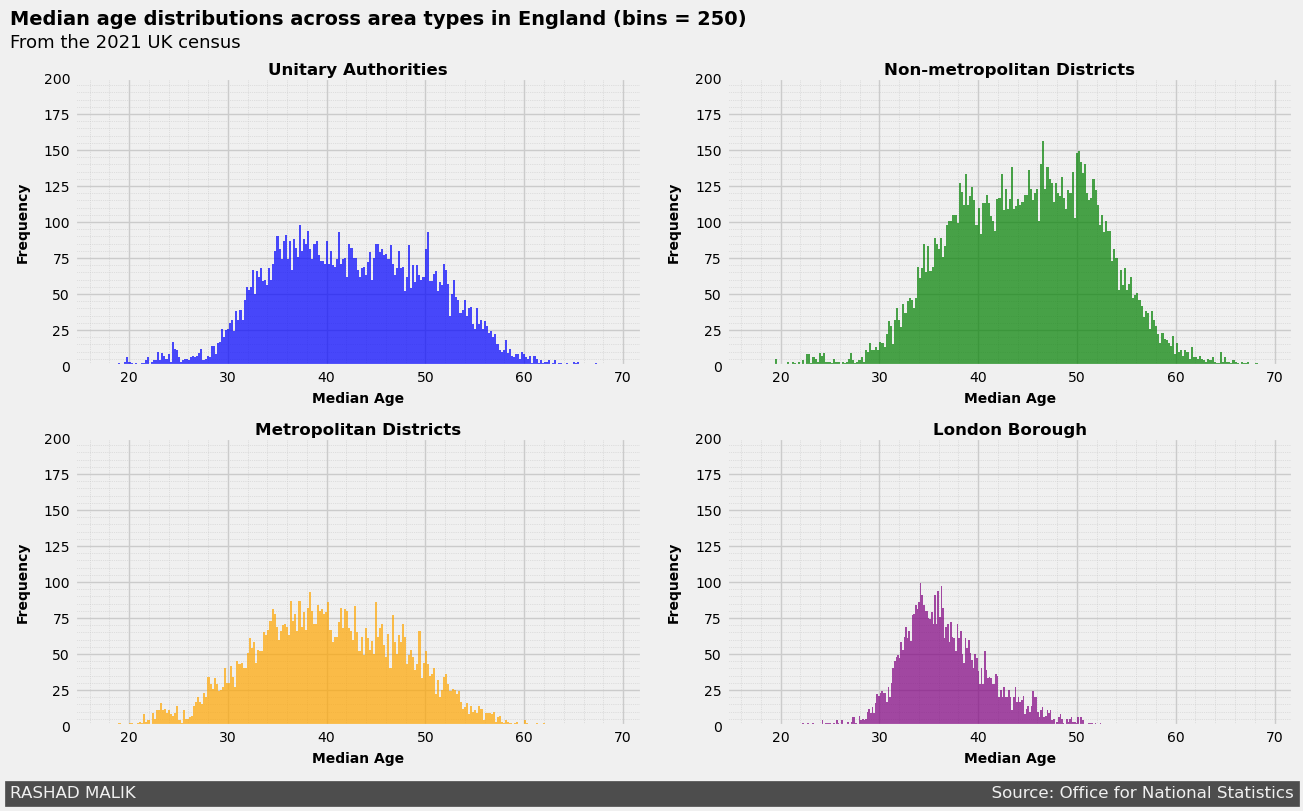

In [26]:
area_types = ["Unitary Authorities", "Non-metropolitan Districts", "Metropolitan Districts", "London Borough"]

# Creating 4 subplots, one for each area type
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Titles and additional labels
plt.text(-58, 487, 
         "Median age distributions across area types in England (bins = 250)", 
         size=14, weight="bold", color="black")
plt.text(-58, 471, 
         "From the 2021 UK census", 
         size=13, color="black")
plt.text(-58, -50, 
         "RASHAD MALIK" + " " * 163 + "Source: Office for National Statistics", 
         color="#f0f0f0", backgroundcolor="#4d4d4d", fontsize=12)

axes = axes.flatten()
x_limit = (lsoa["MedianAge"].min(), lsoa["MedianAge"].max())
y_limit = (0, 200)

colours = ["blue", "green", "orange", "purple"]

# Looping for each subplot
for i, area in enumerate(area_types):
    p3 = gbyAreaType.get_group(area)["MedianAge"]

    axes[i].hist(p3, bins=250, alpha=0.7, color = colours[i])  
    axes[i].set_title(area, fontsize=12, pad=0, fontweight="bold")
    
    axes[i].set_xlabel("Median Age", fontsize=10, fontweight="bold", labelpad=5)
    axes[i].set_ylabel("Frequency", fontsize=10, fontweight="bold", labelpad=10)
    axes[i].set_xlim(x_limit)
    axes[i].set_ylim(y_limit)

    axes[i].tick_params(axis="both", labelsize=10)

    axes[i].minorticks_on()
    axes[i].grid(True, which="both", axis="both")
    axes[i].grid(True, which="minor", axis="both", linestyle=":", linewidth=0.5)

plt.subplots_adjust(hspace=0.25, wspace=0.15) 
plt.show()

#### 3.3 Discussion on the differences between the distributions

From the above histograms, we can now discuss the differences in median age distribution across the area types.
- The **Unitary Authorities** and **Non-metropolitan Districts** both show wide distributions, with median ages spread fairly evenly between 30 and 50 years, although the Non-metropolitan Districts are slightly skewed towards older ages.
- **Metropolitan Districts** have a similar spread, but appear more concentrated around 37 to 40 years, indicating a slightly younger population overall.
- In contrast, the **London Boroughs** show a much more distinct peak around the 32 to 36 year range, reflecting a younger population with fewer older residents compared to other areas.
Overall, while the distributions for the three non-London area types are fairly similar, London stands out with a significantly younger population concentration. This is most likely due to job opportunities, high cost of living, and educational institutions available in London.

### Part 4: Classification of Unusual Areas by Proportions
In this section, we will classify the areas with "unusual" proportions.

#### 4.1 Scatter plot

We begin by creating a scatter plot comparing the older and younger proportions within the LSOAs.

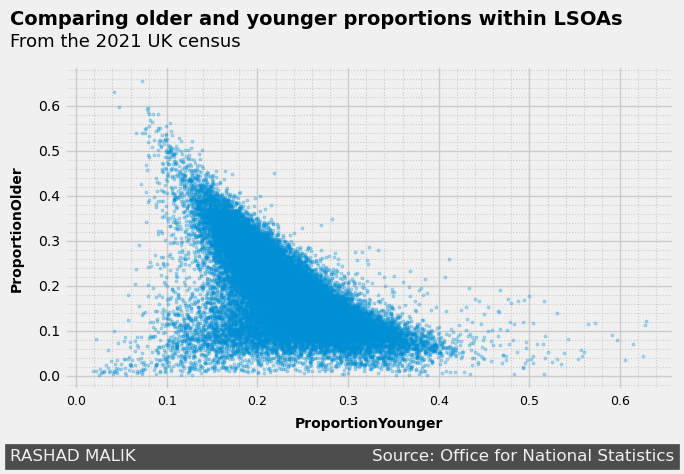

In [27]:
# Plotting and formatting the scatter plot
plt.figure(figsize = (7, 4))
plt.scatter(lsoa["ProportionYounger"], lsoa["ProportionOlder"], s = 5, alpha = 0.3)

plt.text(-0.073, 0.78, 
         "Comparing older and younger proportions within LSOAs", 
         size = 14, weight = "bold", color = "black")
plt.text(-0.073, 0.73, 
         "From the 2021 UK census", 
         size = 13, color = "black")
plt.text(-0.073, -0.19, 
         "RASHAD MALIK" + " " * 45 + "Source: Office for National Statistics", 
         color = "#f0f0f0", 
         backgroundcolor = "#4d4d4d", 
         fontsize=12)

plt.xlabel("ProportionYounger", fontsize = 10, fontweight = "bold", labelpad = 6)
plt.ylabel("ProportionOlder", fontsize = 10, fontweight = "bold", labelpad = 10)

plt.xticks(fontsize = 9)
plt.yticks(fontsize = 10)
plt.minorticks_on()

plt.grid(True, which="both", axis="y")
plt.grid(True, which="minor", axis="both", linestyle=":", linewidth=0.8)

plt.show()

#### 4.2 Comment on the overall shape of the scatter plot

The scatter plot shows an **inverse relationship** between the younger and older proportions in the population, with a **triangular pattern**. Most points cluster densely towards the middle of the triangle, where the proportion of younger individuals is moderate (around 0.2 to 0.3), and the proportion of older individuals is also moderate (around 0.1 to 0.2). This tells us that areas with a balanced population of younger and older individuals are common in England.

As the proportion of younger individuals increases beyond 0.25, the proportion of older individuals sharply decreases, resulting in fewer points in the upper right of the plot. Similarly, at the other extremes, where either the younger or older proportion is very high, the opposite proportion is very low, creating a clear triangular distribution with fewer data points towards the edges of the triangle.

#### 4.3 Classifying the extreme corners

We will now group the corners of the scatter plot triangle, giving each one an ```AgeClass``` that signifies that type of population.

- Bottom left corner (low older and younger proportions) will be marked as ```Workers```.
- Bottom right corner (low older, high younger proportions) will be marked as ```SchoolKids```.
- Top left corner (high older, low younger proportions) will be marked as ```Retirees```.
- All other areas will be marked as ```Normal```.

In [28]:
# Initialising the new column with NaN values
lsoa["AgeClass"] = np.NaN
lsoa["AgeClass"] = lsoa["AgeClass"].astype(object)

# Workers
lsoa.loc[(lsoa["ProportionYounger"] < 0.15) & (lsoa["ProportionOlder"] < 0.15), "AgeClass"] = "Workers"

# SchoolKids
lsoa.loc[(lsoa["ProportionYounger"] > 0.35) & (lsoa["ProportionOlder"] < 0.2), "AgeClass"] = "SchoolKids"

# Retirees
lsoa.loc[(lsoa["ProportionYounger"] < 0.2) & (lsoa["ProportionOlder"] > 0.4), "AgeClass"] = "Retirees"

# Normal
lsoa.loc[lsoa["AgeClass"].isna(), "AgeClass"] = "Normal"

# Printing the first 5 rows of each AgeClass for verification
age_class_filter_workers = lsoa[["LSOAName", "ProportionYounger", "ProportionOlder", "AgeClass"]][lsoa["AgeClass"] == "Workers"]
print("First 5 rows for AgeClass 'Workers':\n", age_class_filter_workers.head(5))

age_class_filter_schoolkids = lsoa[["LSOAName", "ProportionYounger", "ProportionOlder", "AgeClass"]][lsoa["AgeClass"] == "SchoolKids"]
print("\nFirst 5 rows for AgeClass 'SchoolKids':\n", age_class_filter_schoolkids.head(5))

age_class_filter_retirees = lsoa[["LSOAName", "ProportionYounger", "ProportionOlder", "AgeClass"]][lsoa["AgeClass"] == "Retirees"]
print("\nFirst 5 rows for AgeClass 'Retirees':\n", age_class_filter_retirees.head(5))

age_class_filter_normal = lsoa[["LSOAName", "ProportionYounger", "ProportionOlder", "AgeClass"]][lsoa["AgeClass"] == "Normal"]
print("\nFirst 5 rows for AgeClass 'Normal':\n", age_class_filter_normal.head(5))

First 5 rows for AgeClass 'Workers':
         LSOAName  ProportionYounger  ProportionOlder AgeClass
536   Brent 018E               0.15            0.128  Workers
818  Camden 028A              0.102            0.134  Workers
824  Camden 019B               0.12              0.1  Workers
875  Camden 028B              0.122            0.136  Workers
877  Camden 027B              0.147           0.0971  Workers

First 5 rows for AgeClass 'SchoolKids':
                      LSOAName  ProportionYounger  ProportionOlder    AgeClass
6   Barking and Dagenham 015B              0.382           0.0352  SchoolKids
9   Barking and Dagenham 015D              0.376           0.0392  SchoolKids
25  Barking and Dagenham 001D              0.384           0.0679  SchoolKids
42  Barking and Dagenham 021C              0.403           0.0425  SchoolKids
82  Barking and Dagenham 020D              0.351           0.0819  SchoolKids

First 5 rows for AgeClass 'Retirees':
                          LSOAName  Propo

By looking at the above tables, we can see that our classification logic has worked.

#### 4.4 Pivot table

To visualise the the extreme area types, we will create a pivot table to first count the number of LSOAs within each area type, then we will plot it on a bar graph and comment on the differences.

We first begin by constructing a pivot table that excludes the "normal" zones:

In [29]:
corners = lsoa.loc[lsoa["AgeClass"] != "Normal", :]
pivot_table = corners.pivot_table(index="AreaType", values=["Total"], columns=["AgeClass"], aggfunc="count")

print("Table showing the counts of LSOAs within the specified area types:\n")
print(pivot_table)

Table showing the counts of LSOAs within the specified area types:

                              Total                   
AgeClass                   Retirees SchoolKids Workers
AreaType                                              
London Borough                    1         83     272
Metropolitan Districts           29        427     149
Non-metropolitan Districts      263        108      62
Unitary Authorities             127        211     137


Using this pivot table, we are now able to plot a simple bar graph.

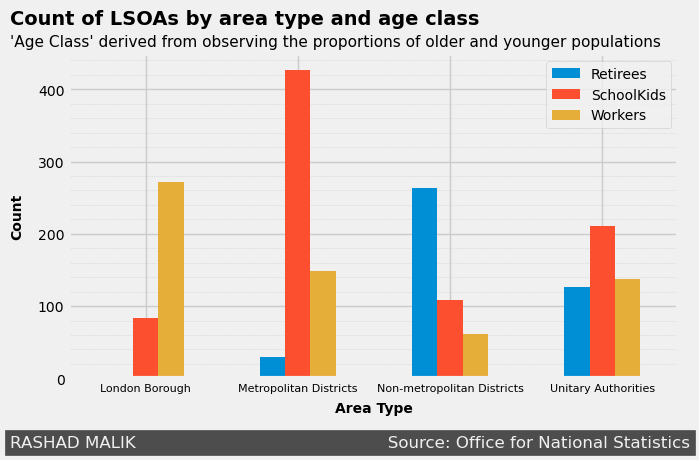

In [30]:
# Plotting the pivot table as a grouped bar chart
pivot_table.plot(kind='bar', figsize=(7, 4))

# Adding labels and title
plt.text(-0.89, 490, 
         "Count of LSOAs by area type and age class", 
         size = 14, weight = "bold", color = "black")
plt.text(-0.89, 460, 
         "'Age Class' derived from observing the proportions of older and younger populations", 
         size = 11, color = "black")
plt.text(-0.89, -95, 
         "RASHAD MALIK" + " " * 48 + "Source: Office for National Statistics", 
         color = "#f0f0f0", 
         backgroundcolor = "#4d4d4d", 
         fontsize=12)

plt.xlabel("Area Type", fontsize = 10, fontweight = "bold", labelpad = 6)
plt.ylabel("Count", fontsize = 10, fontweight = "bold", labelpad = 10)

plt.legend(labels=["Retirees", "SchoolKids", "Workers"], fontsize = 10)
plt.xticks(fontsize = 8, rotation=0)
plt.yticks(fontsize = 10)
plt.minorticks_on()

plt.grid(True, which="both", axis="y")
plt.grid(True, which="minor", axis="y", linestyle=":", linewidth=0.5)

# Show the plot
plt.show()

The above bar chart shows the count of LSOAs across the four area types (London Borough, Metropolitan Districts, Non-metropolitan Districts, and Unitary Authorities), categorised by our defined age classes (Retirees, SchoolKids, Workers).

In **London Boroughs**, the **Workers** class dominates with over 260 LSOAs, while the count of **SchoolKids** is low, and the **Retirees** are so low they are not visible on this chart (from our earlier pivot table, we saw that only one LSOA was flagged as a "Retiree" area). This tells us that London Boroughs are heavily populated by working-age individuals, with a small representation from SchoolKids, and almost no representation from Retirees.

In **Metropolitan Districts**, the distribution has a huge proportion of **SchoolKids** areas (over 420), with smaller counts of **Workers**, and minimal **Retirees** areas. This implies that Metropolitan Districts may have a large presence of schooling institutions or younger populations, though working-age individuals still have a noticeable presence.

In **Non-metropolitan Districts**, the **Retirees** category shows a significant presence, outnumbering both **Workers** and **SchoolKids**. This suggests that these districts may serve as popular residential areas for older individuals. However, there is still a reasonable count of **SchoolKids**, but the count of **Workers** is notably low.

In **Unitary Authorities**, the distribution across all three age classes is the most balanced compared with the other areas, with **SchoolKids** being the most dominant, followed by **Workers** and **Retirees**. This suggests a diverse population structure in these areas, with a mix of working-age, older-age, and younger populations.

We can conclude that the graph highlights the diversity of age class distributions across different area types, with certain areas skewing more towards younger or older populations.

### Part 5: Mapping

This section introduces GeoPandas which is a library for drawing maps.

- Geometry data has the location and shape of each area. A second file containing geometry data is used: LSOA_England_geom.gpkg. The format used is called 'GeoPackage' (see [GeoPackage](https://en.wikipedia.org/wiki/GeoPackage)).
- GeoPandas (see [GeoPandas](https://geopandas.org/)) is a library for working with geometry data built on Pandas.
- GeoDataFrame is a subclass of the Pandas DataFrame class. A GeoDataFrame can contain the same data as a DataFrame plus geometry data. When you load the GeoPackage file you create a GeoDataFrame.
- It is possible to colour an LSOA on the map using a numeric (e.g. median age) or category.

#### 5.1 Installing the GeoPandas package

Done

#### 5.2 Loading the geometry data

In [31]:
import geopandas as gpd
bdf = gpd.read_file("data/LSOA_England_geom.gpkg")

#### 5.3 Joining the data frames

I joined the data frame containing the data from parts 1 to 4 with the GeoDataFrame to create a GeoDataFrame containing both the geometry and the other data.

In [32]:
lsoa_idx = lsoa.set_index('LSOACode')
bdf2 = bdf.join(lsoa_idx, how='right', on='LSOA21CD')

#### 5.4 Plotting and colouring the maps

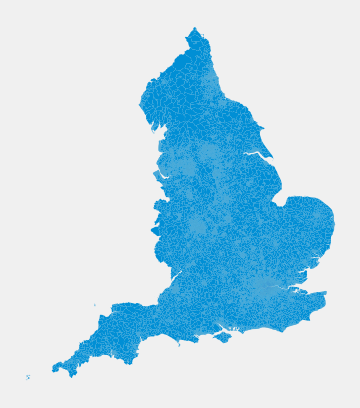

In [33]:
# Basic plot of the geometries
bdf2.plot()
plt.axis("off")
plt.show()

In order to experiment with this library, lets create two maps:
- One to view the **population of London LSOAs**.
  - We have the "London Borough" area flag, so we should be able to narrow the data to those specific LSOAs. 
- One to view the **proportion of Older populations in Non-metropolitan Districts**.
   - Non-metropolitan Districts had higher proportions of Retirees, so it might be interesting to see.

In [34]:
london_lsoas = bdf2[bdf2["AreaType"] == "London Borough"]
nmd_lsoas = bdf2[bdf2["AreaType"] == "Non-metropolitan Districts"]

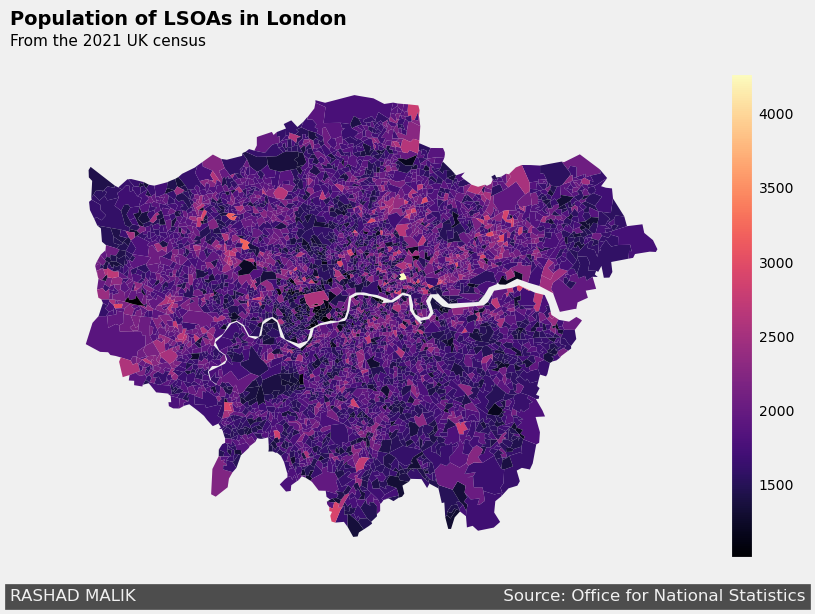

In [35]:
ax = london_lsoas.plot(column="Total", legend=True, figsize=(10, 6), cmap="magma")

colorbar = ax.get_figure().get_axes()[1]
colorbar.tick_params(labelsize=10)
plt.axis("off")

plt.text(0.1, 0.96, 
         "Population of LSOAs in London", 
         size=14, weight="bold", color="black", 
         transform=plt.gcf().transFigure)  # Adjust position based on figure

plt.text(0.1, 0.925, 
         "From the 2021 UK census", 
         size=11, color="black", 
         transform=plt.gcf().transFigure)  # Adjust position based on figure

plt.text(0.1, 0, 
         "RASHAD MALIK" + " " * 70 + "Source: Office for National Statistics", 
         color="#f0f0f0", 
         backgroundcolor="#4d4d4d", 
         fontsize=12, 
         transform=plt.gcf().transFigure)  # Adjust position based on figure

plt.show()

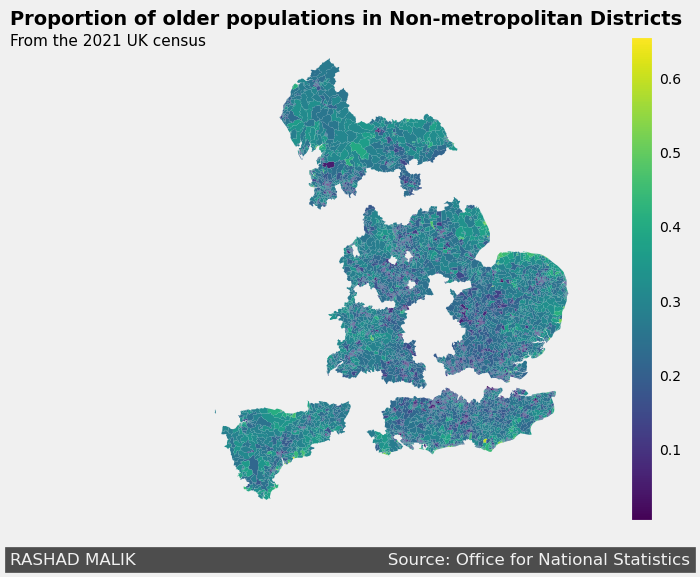

In [36]:
ax = nmd_lsoas.plot(column="ProportionOlder", legend=True, figsize=(10, 6), cmap="viridis")

colorbar = ax.get_figure().get_axes()[1]
colorbar.tick_params(labelsize=10)
plt.axis("off")

plt.text(0.2, 0.9, 
         "Proportion of older populations in Non-metropolitan Districts", 
         size=14, weight="bold", color="black", 
         transform=plt.gcf().transFigure)

plt.text(0.2, 0.865, 
         "From the 2021 UK census", 
         size=11, color="black", 
         transform=plt.gcf().transFigure)

plt.text(0.2, 0, 
         "RASHAD MALIK" + " " * 48 + "Source: Office for National Statistics", 
         color="#f0f0f0", 
         backgroundcolor="#4d4d4d", 
         fontsize=12, 
         transform=plt.gcf().transFigure)


plt.show()

## Summary and conclusion

In this project, we successfully analysed England's population across it's different LSOAs.
- We calculated the total population of England, and used it to analyse the proportion of the population across different age ranges, and different areas.
- We calculated the proportions of older and younger populations, as well as the median age across all English LSOAs.
- Using the calculated median ages, we were able to further explore and analyse the distribution of ages across the country. We grouped the LSOAs by their area types and looked at the differences between them.
- Finally, we created a scatter plot comparing the older and younger population ratios, and analysed the areas that seemed more "extreme" than others.

Our analysis revealed clear distinctions between city, rural, and coastal areas, with each showing unique population distributions. These findings offer valuable insights into how demographic trends vary by area type, which can help inform future policy and planning decisions.

## References

1. **Nomis**, *2021 UK Census Data*, Accessed on: October 2024, [https://www.nomisweb.co.uk](https://www.nomisweb.co.uk/sources/census_2021_bulk).
2. **Office for National Statistics**, *Lower Layer Super Output Areas (LSOAs)*, Accessed on: October 2024, [https://www.ons.gov.uk](https://www.ons.gov.uk/methodology/geography/ukgeographies/statisticalgeographies).
3. **Wikipedia**, *GSS coding system*, Accessed on: October 2024, [https://en.wikipedia.org](https://en.wikipedia.org/wiki/GSS_coding_system).
4. **Geography Linked Data**, *Salford 031C*, Accessed on: October 2024, [https://statistics.data.gov.uk](https://statistics.data.gov.uk/atlas/resource?uri=http%3A%2F%2Fstatistics.data.gov.uk%2Fid%2Fstatistical-geography%2FE01005614).
5. **Geography Linked Data**, *East Devon 012B*, Accessed on: October 2024, [https://statistics.data.gov.uk](https://statistics.data.gov.uk/atlas/resource?uri=http%3A%2F%2Fstatistics.data.gov.uk%2Fid%2Fstatistical-geography%2FE01019957).
6. **GeoPandas Documentation**, Accessed on: October 2024, [https://geopandas.org](https://geopandas.org/).

